In [2]:
import polint
import math
import numpy as np
import matplotlib.pyplot as plt

## Question 1
In python sample sin (x + x<sup>2</sup>) from 0 to 1 at 5 points. Use these points as your table and do fourth order
interpolation on <code>xx=linspace(-0.5,1.5,200)</code>

In [3]:
x, xx = np.linspace(0, 1, 5), np.linspace(-0.5, 1.5, 200)
sinx, sinxx = np.sin(x + x**2), np.sin(xx+xx**2)
y, dy= [polint.polint(x, sinx, w)[0] for w in xx], [polint.polint(x, sinx, w)[1] for w in xx]

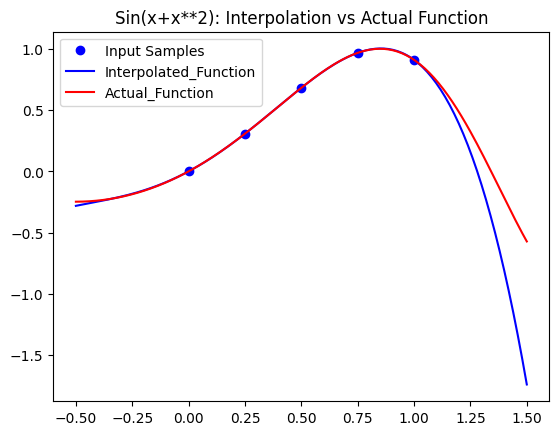

In [4]:
plt.title("Sin(x+x**2): Interpolation vs Actual Function")
plt.plot(x, sinx, 'bo', xx, y, 'b', xx, sinxx, 'r')
plt.legend(["Input Samples", "Interpolated_Function", "Actual_Function"])

## Question 2
Sample the same function at 30 points from 0 to 1. Now you have to choose the nearest 5 points and do
fourth order interpolation. How does the accuracy change? What is the change due to?

In [5]:
def locate(x, v, n):
    x = np.asarray(x)
    nearest_indx = np.abs(x-v).argmin()
    if nearest_indx - n//2 < 1:
        return x[0:n]
    elif nearest_indx + n//2 > len(x):
        return x[-n:]
    return x[nearest_indx-n//2:nearest_indx+n//2 + 1]

In [6]:
def sinlocate(x, v, n, sinx):
    x = np.asarray(x)
    nearest_indx = np.abs(x-v).argmin()
    if nearest_indx - n//2 < 1:
        return sinx[0:n]
    elif nearest_indx + n//2 > len(x):
        return sinx[-n:]
    return sinx[nearest_indx-n//2:nearest_indx+n//2 + 1]

In [7]:
n = 5
x, xx = np.linspace(0, 1, 30), np.linspace(-0.5, 1.5, 200)
sinx, sinxx = np.sin(x + x**2), np.sin(xx + xx**2)
y, dy = [polint.polint(locate(x, w, n), sinlocate(x, w, n, sinx), w)[0] for w in xx] , [[polint.polint(locate(x, w, n), sinlocate(x, w, n, sinx), w)[1] for w in xx]]

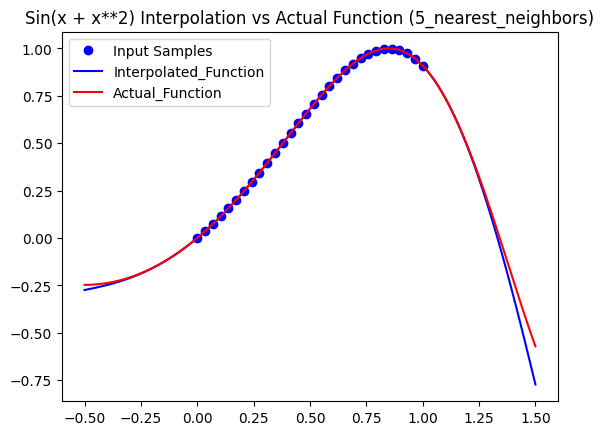

In [8]:
plt.title("Sin(x + x**2) Interpolation vs Actual Function (5_nearest_neighbors)")
plt.plot(x, sinx, 'bo', xx, y, 'b', xx, sinxx, 'r')
plt.legend(["Input Samples", "Interpolated_Function", "Actual_Function"])

## Question 3
With the same table of values, vary the order of interpolation. How does the error vary. Plot the error vs x
for different orders in a semi log plot. Explain the curves you get.

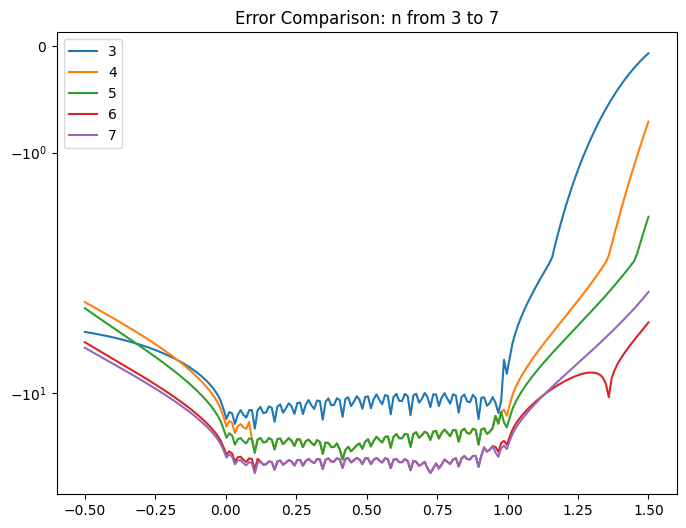

In [9]:
plt.figure(figsize=(8,6))
plt.title("Error Comparison: n from 3 to 7")
plt.yscale("symlog")
np.seterr(all="ignore")
legends = []
for num in range(3, 8):
    y = [polint.polint(locate(x, w, num), sinlocate(x, w, num, sinx), w)[0] for w in xx]
    plt.plot(xx, np.log(np.absolute(y-sinxx)))
    legends.append(str(num))
plt.legend(legends)

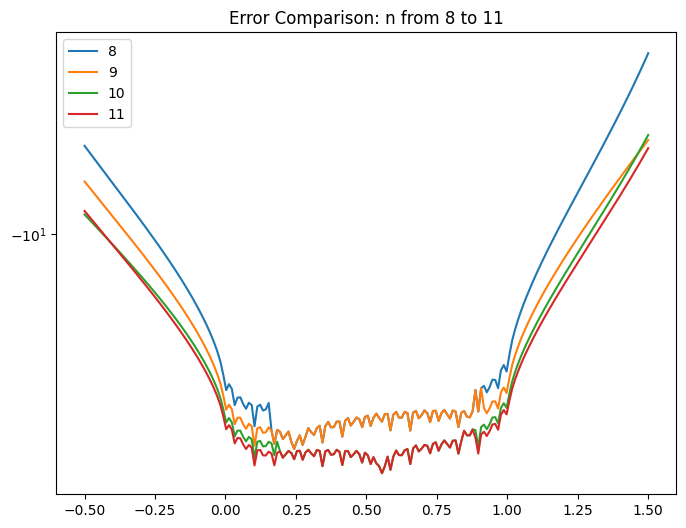

In [10]:
plt.figure(figsize=(8,6))
plt.title("Error Comparison: n from 8 to 11")
plt.yscale("symlog")
np.seterr(all="ignore")
legends = []
for num in range(8, 12):
    y = [polint.polint(locate(x, w, num), sinlocate(x, w, num, sinx), w)[0] for w in xx]
    plt.plot(xx, np.log(np.absolute(y-sinxx)))
    legends.append(str(num))
plt.legend(legends)

### Observations
- We observe that the error more or less decreases with increase in order of interpolation from 3 to 11.
- We find that the error is smaller and less variable in the [0, 1] region and larger outside that region (where the function is being extrapolated).

## Question 4
Vary the interpolation order n from 3 to 20 and determine the way the maximum error varies with order.

In [11]:
order_arr = list(range(3,21))
max_err_arr = []

for order in order_arr:
    y = [polint.polint(locate(x, w, order), sinlocate(x, w, order, sinx), w)[0] for w in xx]
    max_err_arr.append(max(np.absolute(y-sinxx)))

([<matplotlib.axis.XTick at 0x7f4f7fa1c040>,
 [Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

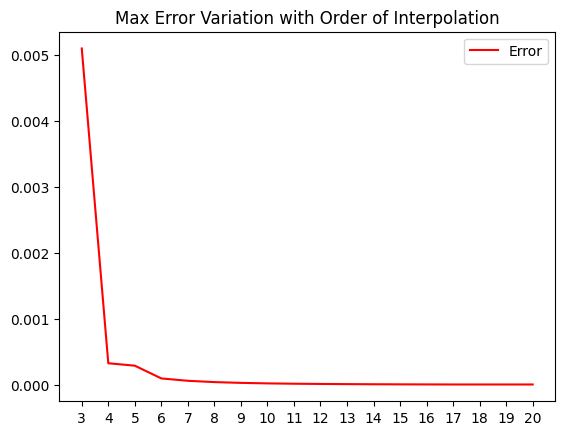

In [56]:
plt.title("Max Error Variation with Order of Interpolation")
plt.plot(order_arr, max_err_arr, 'r')
plt.legend(["Error"])
plt.xticks(np.arange(3, 21, 1))

### Observations
- We observe that the maximum error decreases noticeable with increase in order of interpolation upto a certain point (n = 6), beyond which there is diminishing returns in terms of reduction in maximum error on further increasing the order of interpolation.

## Question 5

In [36]:
x, xx = np.linspace(0.1, 0.9, 17), np.linspace(0.1, 0.9, 1000)
fx, fxx = np.sin(np.pi*x)/np.sqrt(1-x**2), np.sin(np.pi*xx)/np.sqrt(1-xx**2)

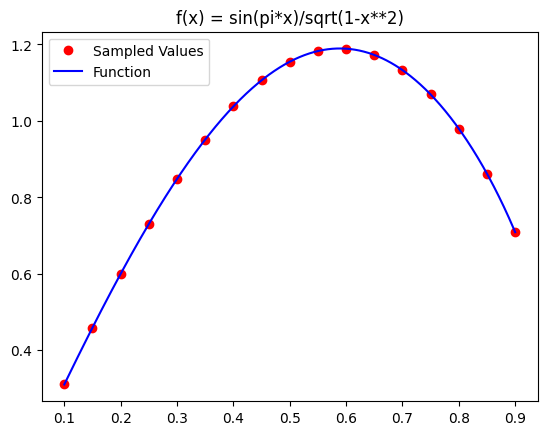

In [37]:
plt.title("f(x) = sin(pi*x)/sqrt(1-x**2)")
plt.plot(x, fx, 'ro', xx, fxx, 'b')
plt.legend(["Sampled Values", "Function"])

In [38]:
def fxlocate(x, v, n, fx):
    x = np.asarray(x)
    nearest_indx = np.abs(x-v).argmin()
    if nearest_indx - n//2 < 1:
        return fx[0:n]
    elif nearest_indx + n//2 > len(x):
        return fx[-n:]
    return fx[nearest_indx-n//2:nearest_indx+n//2 + 1]

In [43]:
order_arr = list(range(3,21))
max_err_arr = []

for order in order_arr:
    y = [polint.polint(locate(x, w, order), fxlocate(x, w, order, fx), w)[0] for w in xx]
    max_err_arr.append(max(np.absolute(y-fxx)))

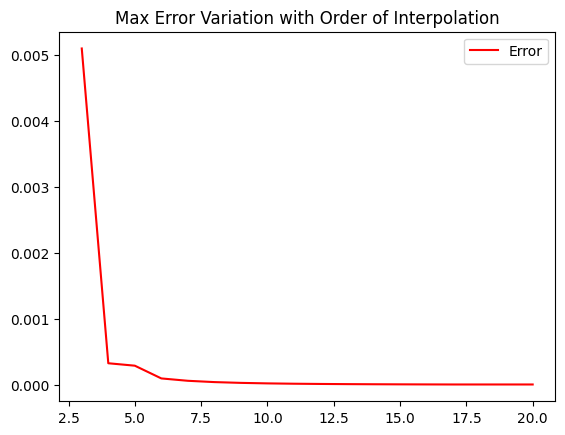

In [44]:
plt.title("Max Error Variation with Order of Interpolation")
plt.plot(order_arr, max_err_arr, 'r')
plt.legend(["Error"])

In [52]:
for i in range(len(order_arr)):
    print("Order: ", order_arr[i], ", MaxError: ", max_err_arr[i], ", Error Less Than 0.00001? -> ", max_err_arr[i] - 0.00001 < 0.0)

Order:  3 , MaxError:  0.005097425851770643 , Error Less Than 0.00001? ->  False
Order:  4 , MaxError:  0.0003265398667237074 , Error Less Than 0.00001? ->  False
Order:  5 , MaxError:  0.00028963168008300233 , Error Less Than 0.00001? ->  False
Order:  6 , MaxError:  9.64326249848213e-05 , Error Less Than 0.00001? ->  False
Order:  7 , MaxError:  6.066215499078709e-05 , Error Less Than 0.00001? ->  False
Order:  8 , MaxError:  4.0896820755254026e-05 , Error Less Than 0.00001? ->  False
Order:  9 , MaxError:  2.898957211716624e-05 , Error Less Than 0.00001? ->  False
Order:  10 , MaxError:  2.1383828409438088e-05 , Error Less Than 0.00001? ->  False
Order:  11 , MaxError:  1.6267278504011884e-05 , Error Less Than 0.00001? ->  False
Order:  12 , MaxError:  1.2708927796256653e-05 , Error Less Than 0.00001? ->  False
Order:  13 , MaxError:  1.0138350727606493e-05 , Error Less Than 0.00001? ->  False
Order:  14 , MaxError:  8.231874868647182e-06 , Error Less Than 0.00001? ->  True
Order:  

### Observations
- The function f(x) is analytic in the region (-1, 1). It is undefined at x = +1, -1, and is imaginary at all other points. As the function approaches x = +1, -1, its value tends to 0.
- By plotting the maximum error for different orders of interpolation of a 1000 points of the function from 0.1 to 0.9, we see that the maximum error is below 1e-05 (giving us 6 digit accuracy) for order = 14 onwards. 